In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df=pd.read_csv("금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [4]:
df.head()

,금리,달러환율
일자,,
2016-07-01,1.210,1152.6
2016-07-04,1.224,1147.5
2016-07-05,1.217,1148.1
2016-07-06,1.203,1153.0
2016-07-07,1.208,1165.8


In [5]:
df.shape

(1171, 2)

In [6]:
df.describe()

,금리,달러환율
count,1171.000000,1171.000000
mean,1.551944,1142.347822
std,0.436781,42.534172
min,0.795000,1057.600000
25%,1.204000,1117.000000
50%,1.654000,1133.400000
75%,1.835000,1177.650000
max,2.316000,1280.100000


In [7]:
df.info

<bound method DataFrame.info of                금리    달러환율
일자                       
2016-07-01  1.210  1152.6
2016-07-04  1.224  1147.5
2016-07-05  1.217  1148.1
2016-07-06  1.203  1153.0
2016-07-07  1.208  1165.8
...           ...     ...
2021-03-25  1.089  1133.5
2021-03-26  1.117  1134.2
2021-03-29  1.119  1131.8
2021-03-30  1.155  1131.7
2021-03-31  1.133  1133.5

[1171 rows x 2 columns]>

In [8]:
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, '금리')

Text(0, 0.5, 'rate')

Text(0.5, 0, 'Date')

Text(0.5, 1.0, ' 달러환율')

Text(0, 0.5, 'rate')

Text(0.5, 0, 'Date')

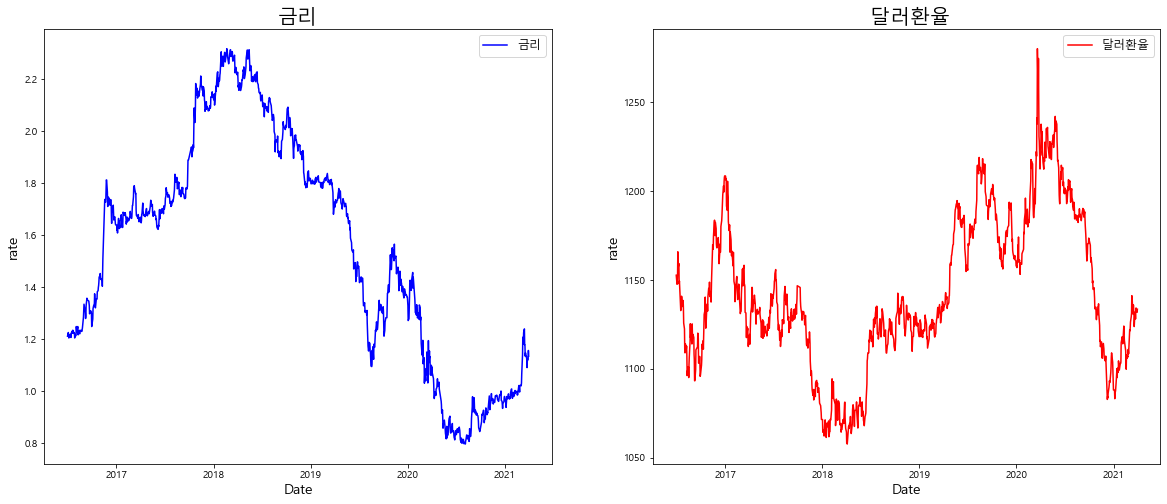

In [9]:
fig = plt.figure(figsize=(20, 8)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,2,1) # subplot 생성
bx = fig.add_subplot(1,2,2)

ax.plot(df['금리'], label='금리', color='b')
bx.plot(df['달러환율'], label='달러환율', color='r')

ax.set_title('금리', fontsize=20) # 타이틀 설정
ax.set_ylabel('rate', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y축 설정

bx.set_title(' 달러환율', fontsize=20) # 타이틀 설정
bx.set_ylabel('rate', fontsize=14) # x축 설정
bx.set_xlabel('Date', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디
bx.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

In [66]:
fig.savefig('금리와 달러환율.png',bbox_inches='tight')

In [10]:
df1=pd.read_csv("당기순익_merge.csv",index_col='결산년도',encoding='euc-kr')

In [11]:
df1.head()

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
결산년도,,,,,,,,,,,,
21년03월(1Q),12852.0,2588.0,13710.0,153145.0,5720.0,8867.0,610.0,71417.0,398.0,1184.0,6033.0,15222.0
20년12월(4Q),5766.0,1426.0,-3434.0,3841.0,3668.0,2699.0,962.0,66071.0,158.0,5847.0,5520.0,11834.0
20년09월(3Q),11942.0,2317.0,5704.0,2353.0,3957.0,3234.0,561.0,93607.0,69.0,12513.0,3913.0,-1888.0
20년06월(2Q),9925.0,2046.0,4191.0,907.0,4322.0,2207.0,520.0,55551.0,-72.0,2029.0,2347.0,3773.0
20년03월(1Q),7389.0,2342.0,363.0,1349.0,3060.0,3466.0,367.0,48849.0,142.0,536.0,3488.0,5527.0


In [12]:
df1.info

<bound method DataFrame.info of               KB 금융  LG 생활건강    LG 화학     NAVER   SK 텔레콤    삼성물산  삼성바이오로직스  \
결산년도                                                                         
21년03월(1Q)  12852.0   2588.0  13710.0  153145.0   5720.0  8867.0     610.0   
20년12월(4Q)   5766.0   1426.0  -3434.0    3841.0   3668.0  2699.0     962.0   
20년09월(3Q)  11942.0   2317.0   5704.0    2353.0   3957.0  3234.0     561.0   
20년06월(2Q)   9925.0   2046.0   4191.0     907.0   4322.0  2207.0     520.0   
20년03월(1Q)   7389.0   2342.0    363.0    1349.0   3060.0  3466.0     367.0   
19년12월(4Q)   5351.0   1338.0   -568.0    1962.0   -464.0  3531.0     776.0   
19년09월(3Q)   9407.0   2171.0   1372.0     853.0   2744.0  2650.0     214.0   
19년06월(2Q)   9915.0   2115.0    838.0     278.0   2591.0  2074.0    -124.0   
19년03월(1Q)   8459.0   2258.0   2119.0     876.0   3736.0  2224.0    -368.0   
18년12월(4Q)   1928.0   1013.0   1266.0    1240.0   4745.0  8046.0    3173.0   
18년09월(3Q)   9540.0   2072.0   3

In [13]:
df1.describe()

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,8182.368421,1805.210526,3441.157895,9650.157895,5010.421053,3014.473684,234.388889,80761.000000,235.684211,1806.210526,4880.842105,7900.789474
std,2717.263231,528.996910,3520.681583,34758.639794,2556.990121,2111.800611,868.337637,28632.600507,116.248323,10469.457147,2055.888920,4790.150318
min,1928.000000,671.000000,-3434.000000,278.000000,-464.000000,524.000000,-570.000000,45379.000000,-72.000000,-13468.000000,-1686.000000,-2033.000000
25%,5770.000000,1554.000000,1319.000000,1073.500000,3444.500000,1975.000000,-305.250000,53910.500000,167.000000,-5774.500000,4347.000000,5066.000000
50%,8974.000000,1921.000000,3381.000000,1720.000000,4745.000000,2583.000000,-112.500000,71417.000000,234.000000,2029.000000,4858.000000,9136.000000
75%,9799.500000,2143.000000,5468.000000,2133.500000,6405.500000,3393.500000,550.750000,110486.500000,320.500000,6610.000000,5927.000000,10938.000000
max,12852.000000,2588.000000,13710.000000,153145.000000,10498.000000,8867.000000,3173.000000,131507.000000,398.000000,29382.000000,7619.000000,15222.000000


<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

Text(0.5, 1.0, '공매도 수량과 잔고수량')

Text(0, 0.5, 'Account')

Text(0.5, 0, 'Date')

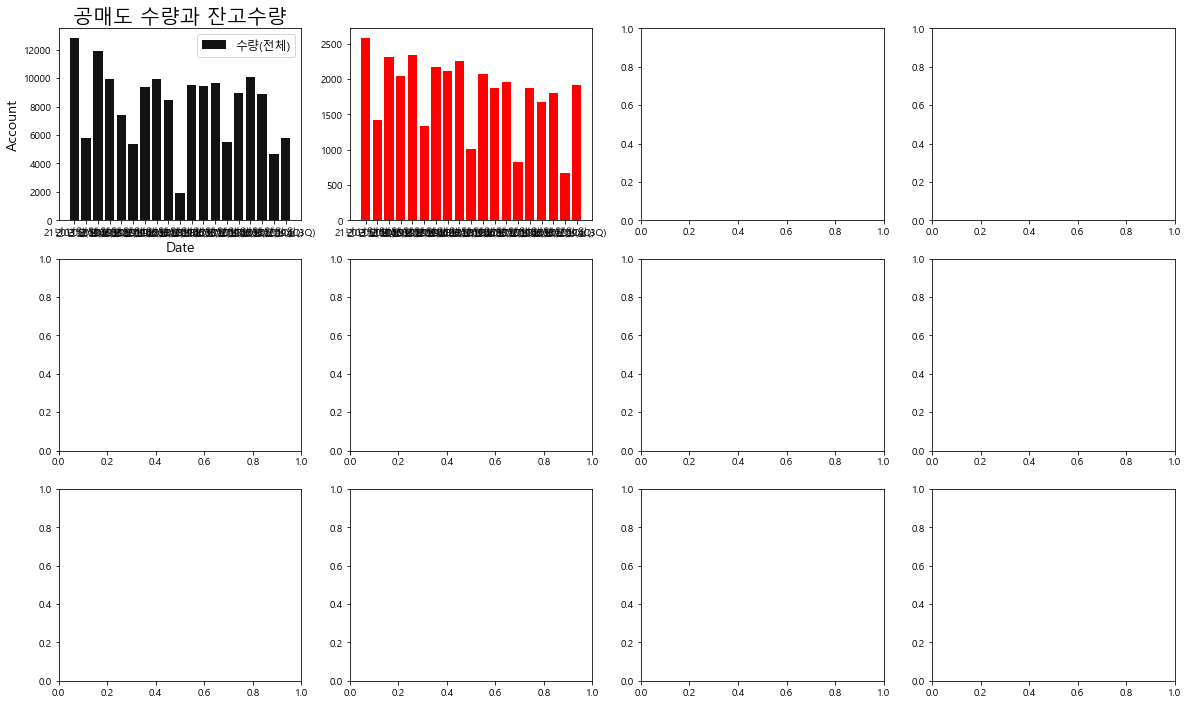

In [14]:
do = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
do1 = do.add_subplot(3,4,1) # subplot 생성
do2 = do.add_subplot(3,4,2) # subplot 생성
do3 = do.add_subplot(3,4,3) # subplot 생성
do4 = do.add_subplot(3,4,4) # subplot 생성
do5 = do.add_subplot(3,4,5) # subplot 생성
do6 = do.add_subplot(3,4,6) # subplot 생성
do7 = do.add_subplot(3,4,7) # subplot 생성
do8 = do.add_subplot(3,4,8) # subplot 생성
do9 = do.add_subplot(3,4,9) # subplot 생성
do10 = do.add_subplot(3,4,10) # subplot 생성
do11 = do.add_subplot(3,4,11) # subplot 생성
do12 = do.add_subplot(3,4,12) # subplot 생성

do1.bar(df1.index,df1['KB 금융'], label='수량(전체)', color='#'+str(12)*3)
do2.bar(df1.index,df1['LG 생활건강'], label='잔고수량', color='r')

do1.set_title('공매도 수량과 잔고수량', fontsize=20) # 타이틀 설정
do1.set_ylabel('Account', fontsize=14) # x축 설정
do1.set_xlabel('Date', fontsize=14) # y축 설정

do1.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'KB 금융')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 생활건강')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'LG 화학')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'NAVER')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

(0.0, 6000.0)

<BarContainer object of 19 artists>

Text(0.5, 1.0, 'SK 텔레콤')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성물산')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성바이오로직스')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '삼성전자')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '포스코 케미칼')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '한국전력')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대 모비스')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

<BarContainer object of 19 artists>

Text(0.5, 1.0, '현대차')

Text(0, 0.5, '순이익')

Text(0.5, 0, '분기')

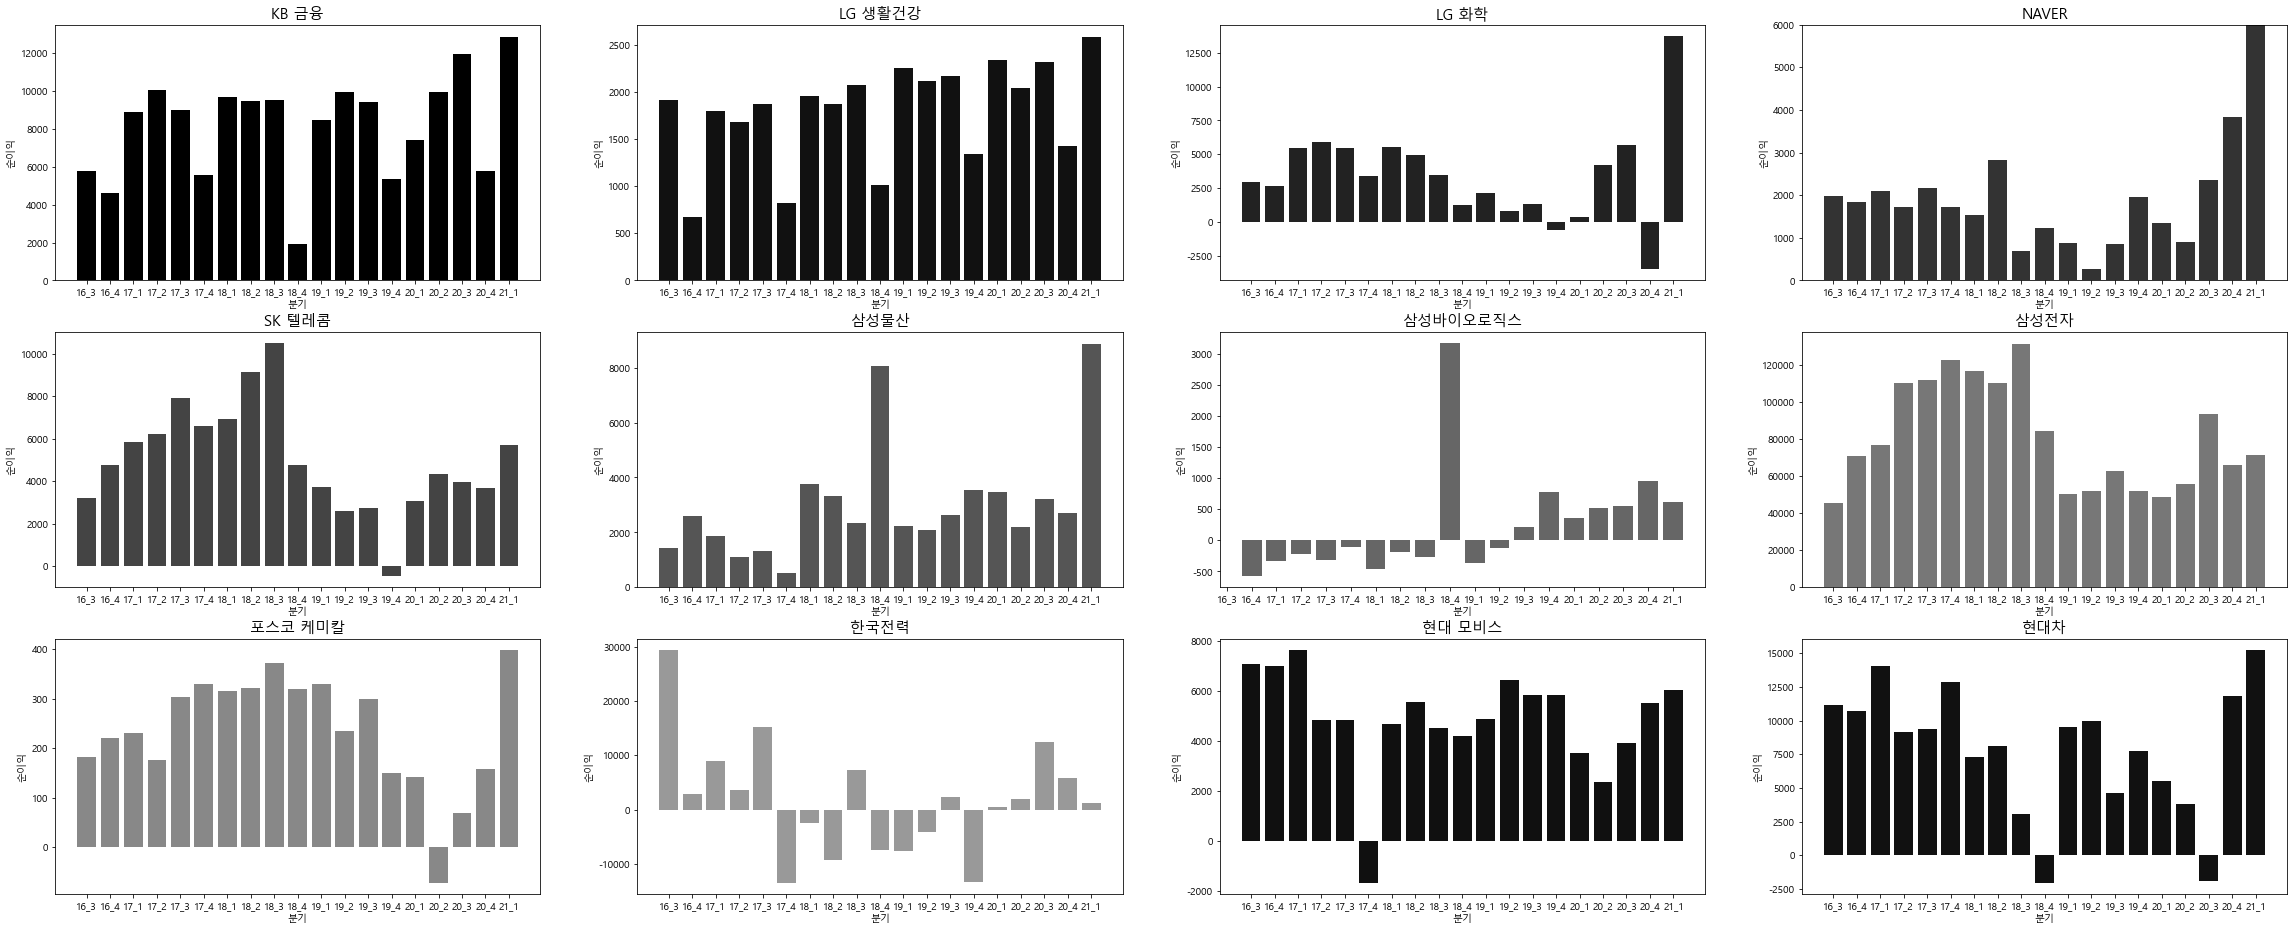

In [16]:
do = plt.figure(figsize=(40, 16)) # 차트 생성 및 사이즈 설정
xtick = ['21_1','20_4','20_3','20_2','20_1','19_4','19_3','19_2','19_1','18_4','18_3','18_2','18_1','17_4','17_3','17_2','17_1','16_4','16_3']
for i in range(len(df1.columns)):
    do1=do.add_subplot(3,4,i+1) # subplot 생성
    do1.bar(xtick,df1[df1.columns[i]], color='#'+str(i)*3)
    do1.set_title(df1.columns[i], fontsize=15) # 타이틀 설정
    do1.set_ylabel('순이익', fontsize=10) # x축 설정
    do1.set_xlabel('분기',fontsize=10) # y축 설정
    do1.invert_xaxis()
    if df1.columns[i]=='NAVER':
        plt.ylim(0,6000)
plt.show()

In [17]:
do.savefig('./당기순익_시각화.png')